# Lecture 13의 데모

### Lecture 13의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec23.ipynb

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Percentiles**

In [ ]:
# Manually compute the 55th percentile
x = make_array(43, 20, 51, 7, 28, 34)

In [ ]:
# Step 1. Sort the data
np.sort(x)

In [ ]:
# Step 2. Figure out where 55th percentile would be.

In [ ]:
# Alternatively: One line of code

In [ ]:
# Discussion question
s = make_array(1, 5, 7, 3, 9)
np.sort(s)

array([1, 3, 5, 7, 9])

## **Total Compensation in Population**

In [ ]:
sf = Table.read_table('san_francisco_2019.csv')
sf.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


In [ ]:
# Who made the most money
sf.sort('Total Compensation', descending=True).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235


In [ ]:
# Who made the least money
sf.sort('Total Compensation', descending=False).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0


In [ ]:
# $15/hr, 20 hr/wk, 50 weeks

min_salary = 15 * 20 * 50
sf = sf.where('Salary', are.above(min_salary))

In [ ]:
sf.num_rows

In [ ]:
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

## **Parameter: Median Total Compensation**

In [ ]:
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

## **Estimating the Parameter (Pretend it is Unknown)**

In [ ]:
sample_size = 400
our_sample = sf.sample(sample_size, with_replacement=False)

In [ ]:
our_sample.show(5)

In [ ]:
percentile(50, our_sample.column('Total Compensation') )

But in the real world we won't be able to keep going back to the population. How to generate a new random sample *without going back to the population?*

# **Bootstrap**

Sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

In [ ]:
# Default behavior of tbl.sample:
# at random with replacement,
# the same number of times as rows of tbl

bootstrap_sample = our_sample.sample()
bootstrap_sample.hist('Total Compensation', bins=sf_bins)

## **Bootstrap Sample Median**
This is one estimate of the population median.

In [ ]:
percentile(50, bootstrap_sample.column('Total Compensation'))

In [ ]:
def one_bootstrap_median():
    # draw the bootstrap sample
    resample = our_sample.sample()
    # return the median total compensation in the bootstrap sample
    return percentile(50, resample.column('Total Compensation'))

In [ ]:
one_bootstrap_median()

In [ ]:
# Generate the medians of 1000 bootstrap samples
num_repetitions = 1000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

In [ ]:
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

In [ ]:
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

In [ ]:
resampled_medians.hist(bins=median_bins)

# Plotting parameters; you can ignore his code
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [ ]:
# Parameter: Median total compensation in the population
def median_comp(t):
    return percentile(50, t.column('Total Compensation'))

median_comp(sf)

135747.0

## **Bootstrap Estimates of the Parameter (Pretend it is Unknown)** 

In [ ]:
# Collect one random sample from the population
sample_size = 100
our_sample = sf.sample(sample_size, with_replacement=False)

# Generate the medians of 1000 bootstrap samples
num_repretitions = 1000
bstrap_medians = make_array()
for i in np.arange(num_repretitions):
    # Resample the same number of rows, with replacement
    resample = our_sample.sample()
    bstrap_medians = np.append(bstrap_medians,
                                median_comp(resample))

# Find the middle 95% of medians; that's a confidence Interval
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

## **Confidence Interval for Unknown Population Mean**

In [ ]:
intervals = Table(['k', 'lower', 'upper', 'sample_size'])

for n in [100, 400]:
    for k in np.arange(intervals.num_rows, intervals.num_rows + 20):
        interval = confidence_interval_95(n)
        intervals = intervals.with_row([
            k, interval.item(0), interval.item(1), n
        ])

intervals.show(4)

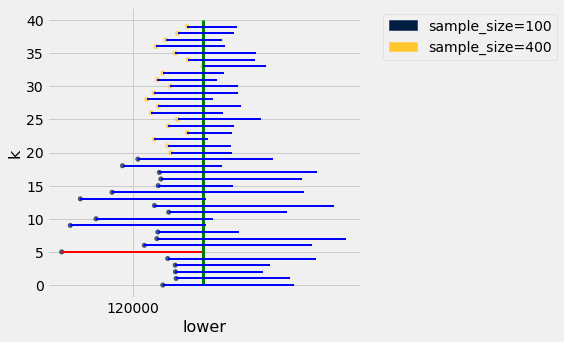

In [ ]:
intervals.scatter('lower', 'k', group='sample_size')
truth = percentile(50, sf.column('Total Compensation'))
plots.plot((truth, truth), (0, intervals.num_rows), color='green', lw=3)
plots.xticks([120000, 1500000])
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'blue'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('k'), row.item('k')),
               color, lw=2)

In [ ]:
intervals = Table(['k', 'lower', 'upper', 'sample_size'])

for n in [2, 4, 8, 16]:
    for k in np.arange(intervals.num_rows, intervals.num_rows + 20):
        interval = confidence_interval_95(n)
        intervals = intervals.with_row([
            k, interval.item(0), interval.item(1), n
        ])

intervals.show(4)

k,lower,upper,sample_size
0,176538,185911,2
1,103264,217424,2
2,112453,240174,2
3,37550,149063,2


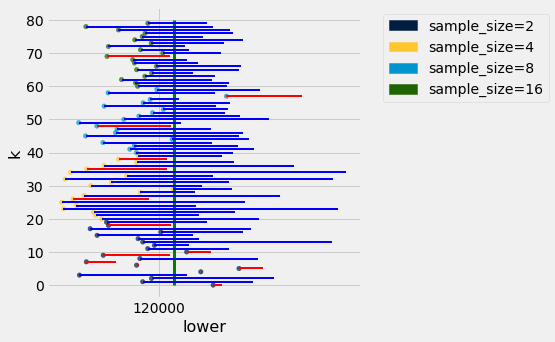

In [ ]:
intervals.scatter('lower', 'k', group='sample_size')
truth = percentile(50, sf.column('Total Compensation'))
plots.plot((truth, truth), (0, intervals.num_rows), color='green', lw=3)
plots.xticks([120000, 1500000])
for row in intervals.rows:
    if row.item('lower') > truth or row.item('upper') < truth:
        color = 'red'
    else:
        color = 'blue'
    plots.plot((row.item('lower'), row.item('upper')),
               (row.item('k'), row.item('k')),
               color, lw=2)

--> Lecture Note로 돌아감

## **Confidence Interval for Unknown Population Mean**

In [ ]:
# Random sample of mother-newborn pairs
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


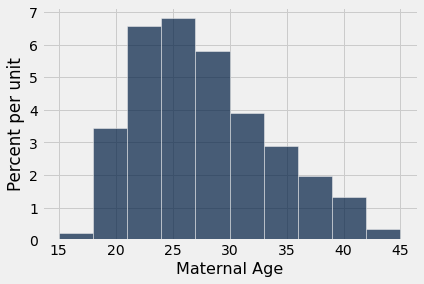

In [ ]:
births.hist('Maternal Age')

In [ ]:
# Average age of mothers in the sample
np.average(births.column('Maternal Age'))

27.228279386712096

### Question
What is the average age of the mothers in the population?

In [ ]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [ ]:
# Generate means from 3000 bootstrap samples
num_repetitions = 3000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

### Bootstrap Percentile Method for Confidence Interval

The interval of estimates is the "middle 95%" of the bootstrap estimates.

This is called a *95% confidence interval* for the mean age in the population.

In [ ]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

In [ ]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

In [ ]:
births.hist('Maternal Age')
plots.plot([left, right], [0, 0], color='yellow', lw=8);